In [197]:
import numpy as np

class SVM:
  def __init__(self, learning_rate=0.1, lambda_param=.1, n_iters=1):
      self.lr = learning_rate
      self.lambda_param = lambda_param
      self.n_iters = n_iters
      self.w = None
      self.b = None

  def fit(self, X, y):
      n_samples, n_features = X.shape
      # y_ = np.where(y <= 0, -1, 1)
      self.w = np.zeros(n_features)
      self.b = 0

      for _ in range(self.n_iters):
          for idx, x_i in enumerate(X):
              # condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
              condition = y[idx] > 0
              if condition:
                  # self.w -= self.lr * (2 * self.lambda_param * self.w)
                  self.w -= self.lr * (  self.w)
              else:
                  # self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                  self.w -= self.lr * ( self.w - np.dot(x_i, y[idx]))
                  self.b -= self.lr * y[idx]


  def predict(self, X):
      approx = np.dot(X, self.w) - self.b
      return np.sign(approx)

In [198]:
from sklearn.model_selection import train_test_split
# from sklearn import datasets
import matplotlib.pyplot as plt

# X, y = datasets.make_blobs(
#     n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=74
# )
X = np.array([[1,0],[0,1],[0,-1],[3,1],[3,2],[4,0]] )
y = np.array([-1,-1, -1, 1, 1 , 1 ])
# X = np.a
# y = np.where(y == 0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=15
)

clf = SVM()
clf.fit(X, y)
# clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

print("SVM classification accuracy", accuracy(y_test, predictions))

SVM classification accuracy 0.5


In [199]:
def visualize_svm():
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, cmap='viridis')

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "r--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "g")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "g")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    # ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()

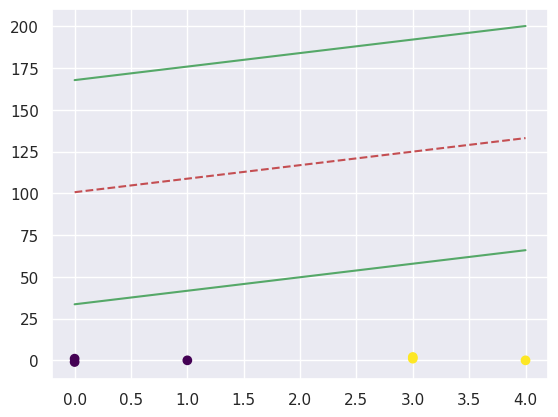

In [200]:
visualize_svm()

# Using Equations

In [144]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [145]:
def geo_margin(y,w,b,x):
    return y*(w / np.linalg.norm(w)).T @ x + (b / np.linalg.norm(w)).flatten()

def functional_margin(y,w,b,x):
    return y*(w.T @ x + b).flatten()

def f(x, w, b, c=0):
    # given x1, return x2 such that [x1,x2] are on the line w.x + b = c
    return (-w[0] * x - b + c) / w[1]

In [146]:
x_neg = np.array([[1,0],[0,1],[0,-1]])
y_neg = np.array([-1,-1,-1])
x_pos = np.array([[3,1],[3,2],[4,0]])
y_pos = np.array([1,1,1])

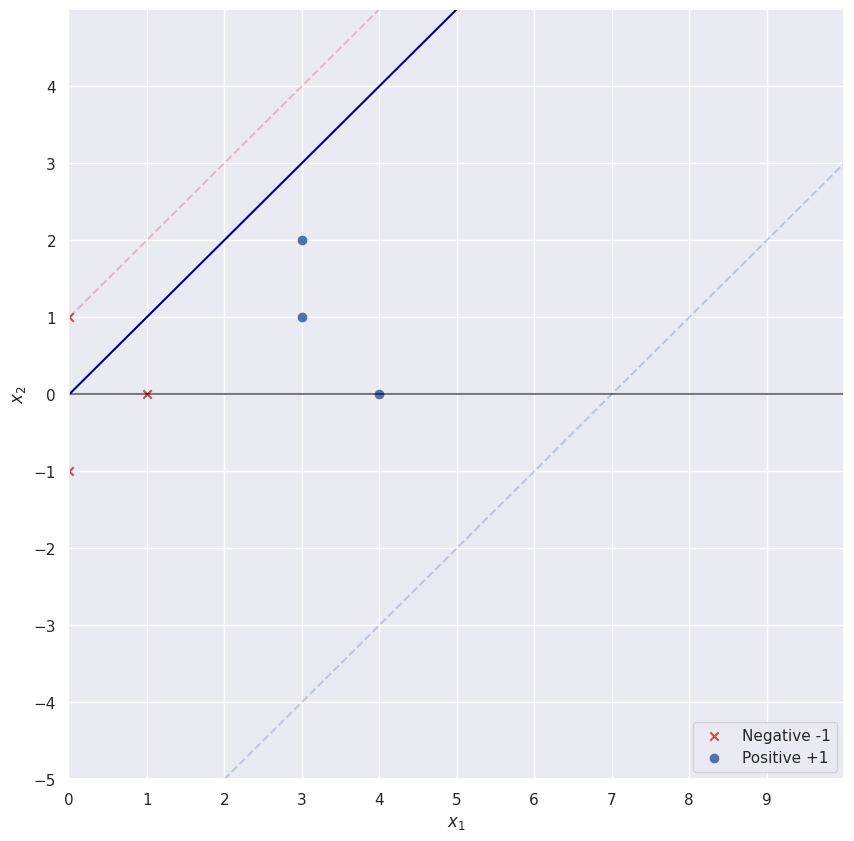

In [147]:
#Data set
x_neg = np.array([[1,0],[0,1],[0,-1]])
y_neg = np.array([-1,-1,-1])
x_pos = np.array([[3,1],[3,2],[4,0]])
y_pos = np.array([1,1,1])

x1 = np.linspace(-10,10)
x = np.vstack((np.linspace(-10,10),np.linspace(-10,10)))

#Parameters guessed by inspection
w = np.array([1,-1]).reshape(-1,1)
b = -3

#Plot
fig = plt.figure(figsize = (10,10))
plt.scatter(x_neg[:,0], x_neg[:,1], marker = 'x', color = 'r', label = 'Negative -1')
plt.scatter(x_pos[:,0], x_pos[:,1], marker = 'o', color = 'b',label = 'Positive +1')
plt.plot(x1, x1  , color = 'darkblue')
plt.plot(x1, x1  - 7, linestyle = '--', alpha = .3, color = 'b')
plt.plot(x1, x1  + 1, linestyle = '--', alpha = .3, color = 'r')
plt.xlim(0,10)
plt.ylim(-5,5)
plt.xticks(np.arange(0, 10, step=1))
plt.yticks(np.arange(-5, 5, step=1))

#Lines
plt.axvline(0, color = 'black', alpha = .5)
plt.axhline(0,color = 'black', alpha = .5)
# plt.plot([2,6],[3,-1], linestyle = '-', color = 'darkblue', alpha = .5 )
# plt.plot([4,6],[1,1],[6,6],[1,-1], linestyle = ':', color = 'darkblue', alpha = .5 )
# plt.plot([0,1.5],[0,-1.5],[6,6],[1,-1], linestyle = ':', color = 'darkblue', alpha = .5 )

# #Annotations
# plt.annotate(s = '$A \ (6,-1)$', xy = (5,-1), xytext = (6,-1.5))
# plt.annotate(s = '$B \ (2,3)$', xy = (2,3), xytext = (2,3.5))#, arrowprops = {'width':.2, 'headwidth':8})
# plt.annotate(s = '$2$', xy = (5,1.2), xytext = (5,1.2) )
# plt.annotate(s = '$2$', xy = (6.2,.5), xytext = (6.2,.5))
# plt.annotate(s = '$2\sqrt{2}$', xy = (4.5,-.5), xytext = (4.5,-.5))
# plt.annotate(s = '$2\sqrt{2}$', xy = (2.5,1.5), xytext = (2.5,1.5))
# plt.annotate(s = '$w^Tx + b = 0$', xy = (8,4.5), xytext = (8,4.5))
# plt.annotate(s = '$(\\frac{1}{4},-\\frac{1}{4}) \\binom{x_1}{x_2}- \\frac{3}{4} = 0$', xy = (7.5,4), xytext = (7.5,4))
# plt.annotate(s = '$\\frac{3}{\sqrt{2}}$', xy = (.5,-1), xytext = (.5,-1))

#Labels and show
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc = 'lower right')
plt.show()


In [148]:
from sklearn.svm import SVC

# X = np.array([[3,4],[1,4],[2,3],[6,-1],[7,-1],[5,-3]] )
X = np.array([[1,0],[0,1],[0,-1],[3,1],[3,2],[4,0]] )
y = np.array([-1,-1, -1, 1, 1 , 1 ])

clf = SVC(C = 1e5, kernel = 'linear')
clf.fit(X, y)

print('w = ',clf.coef_)
print('b = ',clf.intercept_)
print('Indices of support vectors = ', clf.support_)
print('Support vectors = \n', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_))

w =  [[0.8 0.4]]
b =  [-1.8]
Indices of support vectors =  [0 3]
Support vectors = 
 [[1. 0.]
 [3. 1.]]
Number of support vectors for each class =  [1 1]
Coefficients of the support vector in the decision function =  [[0.4 0.4]]
